In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [34]:
year[0:-6]

array([[1790.],
       [1800.],
       [1810.],
       [1820.],
       [1830.],
       [1840.],
       [1850.],
       [1860.],
       [1870.],
       [1880.],
       [1890.],
       [1900.],
       [1910.],
       [1920.],
       [1930.],
       [1940.],
       [1950.]])

r = 4.171055611159892e-11, t* = 1982.128960318204


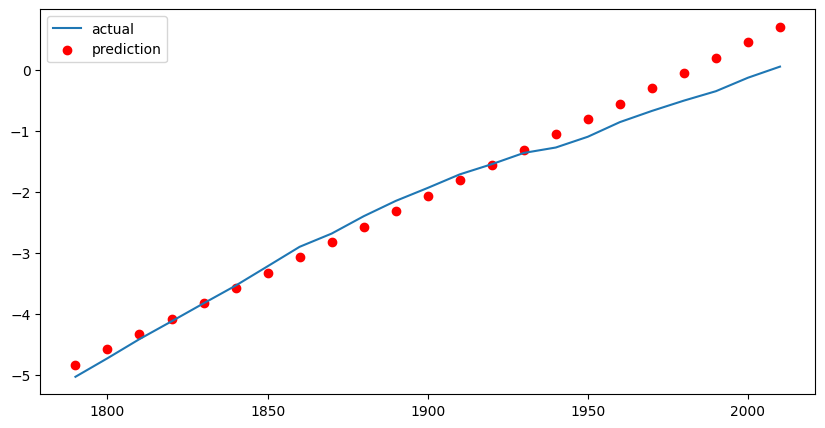

In [7]:
M = 602788000

year = np.linspace(1790, 2010, 23)
year = year.reshape(-1,1)
pop = np.array([3929, 5308, 7240, 9638, 12866, 17069, 23192, 31443, 38558, 50156, 62948, 75995, 91972, 105711,122755, 131669, 150697, 179323, 203212, 226505, 248710, 281416, 308746])
pop = pop * 1000
pop = np.log(pop/(M-pop))


reg = LinearRegression().fit(year[0:-6],pop[0:-6])
pop_pred = reg.predict(year)

plt.figure(figsize = (10,5))
plt.plot(year, pop, label = 'actual')
plt.scatter(year, pop_pred, label = 'prediction', c = 'r')
plt.legend()

reg_a0 = reg.intercept_
reg_a1 = reg.coef_[0]

r = reg_a1/M
t_star = -reg_a0/(M*r)

print("r = {}, t* = {}".format(r, t_star))

Error in year [1960.] : [22.04176653]%
Error in year [1970.] : [25.64601878]%
Error in year [1980.] : [29.46424096]%
Error in year [1990.] : [33.25484182]%
Error in year [2000.] : [30.99625307]%
Error in year [2010.] : [30.79673909]%


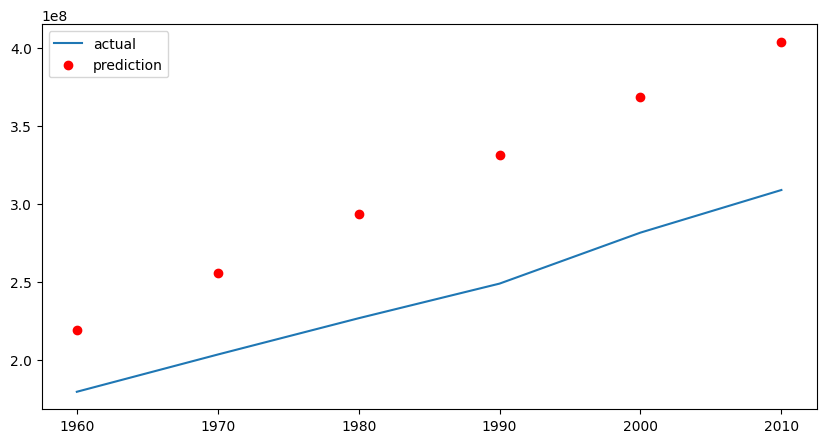

In [10]:
pop = np.array([3929, 5308, 7240, 9638, 12866, 17069, 23192, 31443, 38558, 50156, 62948, 75995, 91972, 105711,122755, 131669, 150697, 179323, 203212, 226505, 248710, 281416, 308746])
pop = pop * 1000
pop_pred = 602788000 / (1 + np.exp(-0.0254*(year[17:] - 1982.13)))

plt.figure(figsize = (10,5))
plt.plot(year[17:], pop[17:], label = 'actual')
plt.scatter(year[17:], pop_pred, label = 'prediction', c = 'r')
plt.legend()

for i in range(6):
    print("Error in year {} : {}%".format(year[i+17], (pop_pred[i] - pop[i+17])*100/pop[i+17]))



In [18]:
N = 5000

days = (np.array([2,6,10])).reshape(-1,1)
logged = (np.array([-0.5, 1.5, 3.5])).reshape(-1,1)


reg = LinearRegression().fit(days, logged)
pred_logged = reg.predict(days)

reg_a0 = reg.intercept_
reg_a1 = reg.coef_[0]

print("5000k = {}, c* = {}".format(reg_a0, reg_a1))
print("prediction : {}, actual : {}".format(pred_logged.ravel(), logged.ravel()))

5000k = [-1.5], c* = [0.5]
prediction : [-0.5  1.5  3.5], actual : [-0.5  1.5  3.5]


In [22]:
reg.predict(np.array([[12]]))

array([[4.5]])